# WS 01

In [8]:
import cv2
import numpy as np

In [ ]:
image = np.array([[1, 0, 2, 1, 0],
                  [0, 2, 3, 0, 1],
                  [1, 0, 1, 1, 2],
                  [0, 2, 2, 0, 3],
                  [0, 4, 1, 2, 0]])

image = image / 5.0

In [ ]:
kernel1 = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

im2 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

In [ ]:
im2_int = (im2*5).astype('int')
im2_int

array([[ 0,  7, -3, -6,  0],
       [ 0,  4,  0, -3,  0],
       [ 0,  5, -3,  0,  0],
       [ 0,  3, -3,  0,  0],
       [ 0,  5, -6,  0,  0]])

# ws 02

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


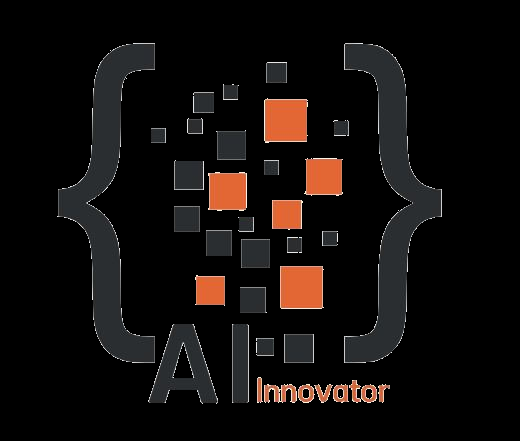

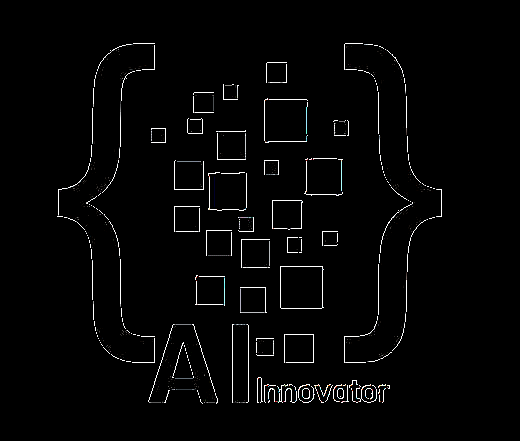

In [9]:
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/MyDrive/AI Innovator Bootcamp2024/CNN/ailogo.png')

if image is None:
    print('Could not read image')


#kernel1 = np.array([[-1, 0, 1], #
                   # [-3, 0, 3],
                   # [-1, 0, 1]])

#kernel1 = np.array([[-1,-3, -1], #
                   # [0,  0,  0],
                   # [1,  3,  1]])


#kernel1 = np.array([[0,  1,  3], #
                   # [-1,  0, 1],
                   # [-3,-1,  0]])

kernel1 = np.array([[-3, -1, 0], #
                    #[-1,  0, 1],
                    #[0,  1, 3]])

#kernel1 = np.array([[-1, -1, -1], #
                     [-1, 8, -1],
                    [-1, -1, -1]])

fea_map = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)


cv2_imshow(image)
cv2_imshow(fea_map)
cv2.imwrite('feature_map1.jpg', fea_map)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# prompt: sum fea_map

sum_of_feature_map = np.sum(fea_map)
print(f"The sum of the feature map is: {sum_of_feature_map}")


The sum of the feature map is: 3646515


# ws 03

In [11]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D

image = np.array([[2, 3, 4, 2],
                  [8, 5, 5, 1],
                  [6, 7, 9, 4],
                  [3, 1, 4, 5]])

arr = image.reshape(1, 4, 4, 1).astype('float32')

model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2) ))
#model.add(AveragePooling2D(pool_size=(2, 2)))

output = model.predict(arr)
output = np.squeeze(output)
print(output)

1/1 [==============================] - 0s 74ms/step
[[8. 5.]
 [7. 9.]]


# ws 04

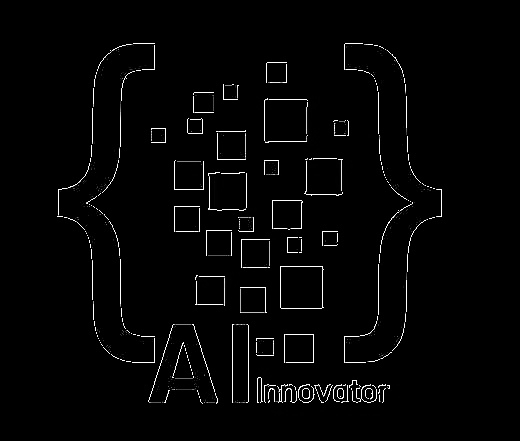

In [12]:
import numpy as np
from PIL import Image, ImageOps

imgfile = 'feature_map1.jpg'

image = Image.open(imgfile).convert('L')
image

In [13]:
pixel = np.array(image)
pixel.shape

(441, 520)

1/1 [==============================] - 0s 41ms/step


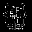

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D

resized_pixel = cv2.resize(pixel, (64, 64))
arr = resized_pixel.reshape(1, 64, 64, 1)

model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(MaxPool2D(pool_size=(3, 3)))

output = model.predict(arr)

output = np.squeeze(output)
Image.fromarray(output)

In [15]:
output.shape

(32, 32)